# Study photon-detection and stochastic fluctuations close to the phase transition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

from scipy import signal

seed_hom = 3
seed_photo = 7


import matplotlib.gridspec as gridspec

from scipy.linalg import logm

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

def moving_average(x, w):
    return np.convolve(x, np.ones(w), mode='same') /w

# Define PPK model
​
Hamiltonian is 
\begin{equation}
H = G( a^{2} + a^{\dagger 2}) + \frac{U}{2} a^{\dagger 2} a^{2} - \Delta a^{\dagger}a
\end{equation}
​
Master equation for this is 
\begin{equation}
\frac{d \rho}{dt} = - i[H, \rho] + \kappa \mathcal{D}[a]\rho
\end{equation}
 
Study under Homodyne detection first, since we saw divergence near the steadystate

Use parity operator defined as
\begin{equation}
P = \sum_{i=0}^{n} (-1)^{n} |n\rangle \langle n |
\end{equation}

Study the parity operator as a function of detuning and n

# Study Homodyne for large and small N

First compute of $\Delta$ where the phase transition occurs
\begin{equation}
\Delta > \sqrt{G^{2} - \frac{\kappa^{2}}{4}}
\end{equation}

In [ ]:
# Define parameters

na = 3
G = 1
U = 1/na
κ =  1
ϵ = 0.0*np.sqrt(na)
Δ = 2
k2 = 0.0/na

In [46]:
N = 30

nvals = np.arange(1, 8)
Δvals = np.arange(0, 3, 0.2)

a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j*(a - a.dag())/np.sqrt(2)


H = (G/2) * (a**2 + a.dag()**2) + (U/2)*a.dag()**2 * a**2 + ϵ*(a + a.dag()) - Δ*a.dag()*a
c_ops = [np.sqrt(κ)*a]
rho0 = steadystate(H, c_ops)
psi0 = rho0.eigenstates()[1][0]


In [ ]:
# Get wigner function
X = np.linspace(-10, 10, 300)
P = np.linspace(-10, 10, 300)

XX, PP = np.meshgrid(X, P)

w = wigner(rho0, X, P)

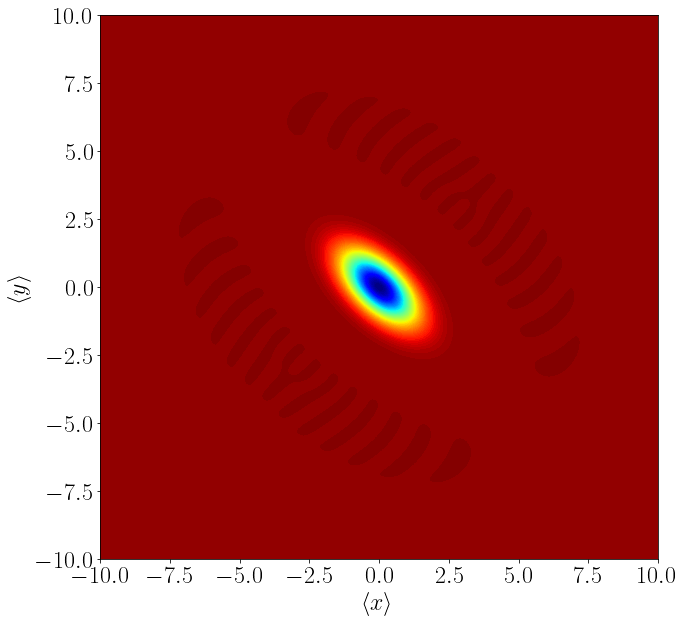

In [ ]:
plt.figure(figsize=(10,10))

lvls = 100
fs = 24
plt.contourf(X, P, w, cmap='jet_r', alpha=1, levels=lvls)
# plt.contour(X, P, w, cmap='bone', alpha=1, levels=lvls, vmin=0.02, vmax=np.max(w), linewidths=1)
# plt.xlim([-15,15])
# plt.ylim([-5,5])

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.xlabel(r'$\langle x \rangle$', fontsize=fs)
plt.ylabel(r'$\langle y \rangle$', fontsize=fs)

plt.show()

In [20]:
# Define time parameters of the system
tm = 0
tM = 800
ts = 0.01
dt = ts
fs = int(1/ts)
t = np.arange(tm, tM, ts)

# Dictionary of observables
e_dict = {'n': n,
         'x': x,
         'p': p,
         'n2': n**2,
         'x2': x**2
         }
# Specify observables
e_ops = list(e_dict.values())

In [21]:
sc_ops = [np.sqrt(κ)*a]
ntraj = 1   # Number of trajectories to average over
nsubsteps = 20

output_hom1 = ssesolve(H, psi0, t, 
                        c_ops = [],
                        sc_ops = sc_ops,
                        ntraj=ntraj, 
                        e_ops = e_ops,
                        nsubsteps=nsubsteps,
                        method='homodyne',
                        store_measurement=True,
                      noise=seed_hom)

# Create dictionary of observables
e_t_hom = {key: out for key, out in zip(e_dict, output_hom1.expect)}

Total run time:  26.30s


In [24]:
phom = np.real(output_hom1.measurement[0].T[0])
Ihom = phom

lfs = 0.01

# Pass through butterworth filter
sos = signal.butter(1, lfs, 'low', fs=fs, output='sos')
filtered = signal.sosfilt(sos, Ihom)

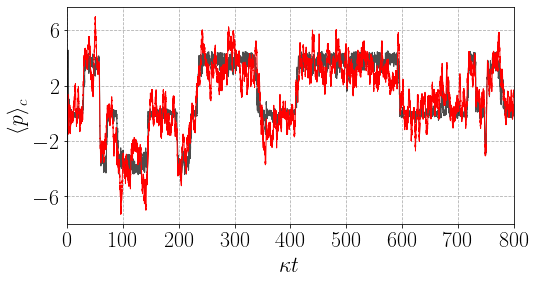

In [28]:
fig = plt.figure(figsize=(8, 4))
# G = gridspec.GridSpec(2, 1)

fs = 22
c1 = [0., 0.0, 0]
c2 = [1, 0, 0]


plt.plot(t, e_t_hom['p'], color=c1 ,label=r'$\langle p \rangle_{c}$', alpha=0.7, linewidth=1)
plt.plot(t, -2*filtered, color='r' ,label=r'$\tilde{I}_{\rm diff}(t)$', alpha=1, linewidth=1)
plt.ylabel(r'$\langle p \rangle_{c}$', fontsize=fs)
plt.grid(True, linestyle='--')
plt.yticks(np.arange(-6, 10, 4), fontsize=fs)
# ax1.set_ylim([0, 12])

# plt.legend( fontsize=20)

plt.xlim([0, 800])
plt.xticks(np.arange(0, 900, 100), fontsize=fs)
plt.xlabel(r'$\kappa t$', fontsize=fs)

plt.xlim([tm, tM])

plt.show()

fig.savefig('homodyne_kerr.png', bbox_inches='tight', dpi=200)

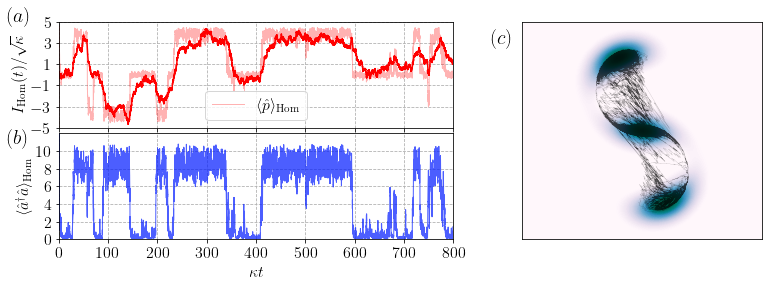

In [ ]:
fig = plt.figure(figsize=(14, 4))
G = gridspec.GridSpec(2, 10)

fs = 16
lw=2

ax1 = plt.subplot(G[0, 0:5])

c1 = [0., 0.1, 1]
c2 = [1, 0, 0]
ax1.plot(t, -2*filtered, color='r', linewidth=1.5, alpha=1)
ax1.plot(t, e_t_hom['p'], color='r',label=r'$\langle \hat{p} \rangle_{\rm Hom}$', alpha=0.3, linewidth=1)

# ax1.set_ylabel(r'$\langle x \rangle$', fontsize=fs)
ax1.set_ylabel(r'$I_{\rm Hom}(t)/\sqrt{\kappa}$', fontsize=fs)
# ax1.set_xlabel(r'$t$', fontsize=fs)
ax1.tick_params(axis='x', labelsize=fs)
ax1.tick_params(axis='y', labelsize=fs)
ax1.set_xlim([0, 800])
ax1.set_xticks(np.arange(0, 900, 100))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(-5, 7, 2))
ax1.tick_params(axis='y', labelsize=fs)
ax1.set_ylim([-5, 5])

ax1.legend(fontsize=fs)


ax1.annotate(r'$(a)$', (-0.13,1), fontsize = 20, xycoords="axes fraction")

ax1.grid(True, linestyle='--')


x0 = 387
xf = 645


ax2 = plt.subplot(G[1, 0:5])

color = c1
ax2.plot(t, e_t_hom['n'], color=color ,label=r'$\langle \hat{x} \rangle_{\rm Hom}$', alpha=0.7, linewidth=1)
# ax2.plot(t, nfilt, color=c1, linestyle='--', linewidth=3)

ax2.set_xlabel(r'$\kappa t$', fontsize=fs)
ax2.set_ylabel(r'$\langle \hat{a}^{\dagger} \hat{a} \rangle_{\rm Hom}$', fontsize=fs)
ax2.tick_params(axis='y', labelsize=fs)
ax2.tick_params(axis='x', labelsize=fs)

ax2.annotate(r'$(b)$', (-0.13,0.9), fontsize = 20, xycoords="axes fraction")

ax2.set_xlim([0, 800])
ax2.set_xticks(np.arange(0, 900, 100))
ax2.grid(True, linestyle='--')
ax2.set_yticks(np.arange(0, 12, 2))

ax2.set_ylim([0, 12])
ax3 = plt.subplot(G[0:2, 6:9])

ll = 6

start = 200
ax3.plot(e_t_hom['x'][start:],  e_t_hom['p'][start:], 'k' ,label=r'$\langle x \rangle$', alpha=0.7,linewidth=0.1)
plt.contourf(X, P, w, cmap='PuBuGn', alpha=1, levels=lvls, vmin=0.005)
# plt.contourf(X, P, w, cmap='jet_r', alpha=0.9, levels=10, vmin=0.005)
# plt.contour(X, P, w, colors='w', alpha=0.9, levels=10, vmin=0.005)
# ax3.contour(X, P, w, cmap='jet_r', alpha=0.7, levels=lvls, vmin=np.min(w), vmax=np.max(w))
ax3.set_ylim([-ll,ll])
ax3.set_xlim([-ll,ll])

ax3.annotate(r'$(c)$', (-0.13,0.9), fontsize = 20, xycoords="axes fraction")

ax3.set_xticks([])
ax3.set_yticks([])


plt.subplots_adjust(hspace = 0.05, wspace = -0.1)

plt.show()

# fig.savefig('homodyne.png', dpi=500, bbox_inches='tight')

In [26]:
output_photo = photocurrent_sesolve(H, psi0, t, 
                        c_ops = [],
                        sc_ops = sc_ops,
                        ntraj=ntraj, 
                        e_ops = e_ops,
                        nsubsteps=nsubsteps, store_measurement=True, noise=seed_photo)

# Create dictionary of observables
e_t_photo = {key: out for key, out in zip(e_dict, output_photo.expect)}

Total run time:   5.10s


In [ ]:
detections = np.real(output_photo.measurement[0].T[0])*dt

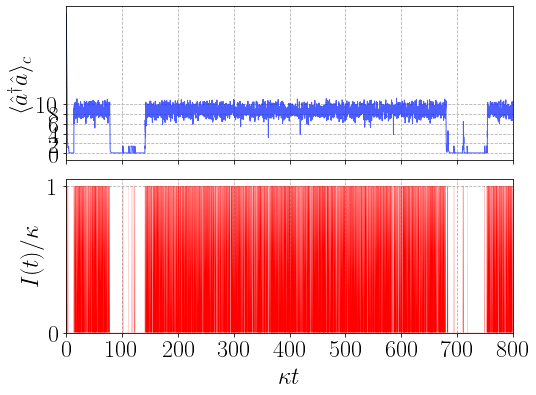

In [ ]:
fig = plt.figure(figsize=(8, 6))
G = gridspec.GridSpec(2, 1)

ax1 = plt.subplot(G[0, 0])

fs = 24
c1 = [0., 0.1, 1]
c2 = [1, 0, 0]


ax1.plot(t, e_t_photo['n'], color=c1 ,label=r'$\langle x \rangle$', alpha=0.7, linewidth=1)
ax1.set_ylabel(r'$\langle \hat{a}^{\dagger}\hat{a} \rangle_{c}$', fontsize=fs)
ax1.tick_params(axis='y', labelcolor='k', labelsize=fs)
ax1.tick_params(axis='x', labelsize=fs)
ax1.grid(True, linestyle='--')
ax1.set_yticks(np.arange(0, 12, 2))
ax1.set_ylim([0, 12])

ax1.set_xlim([0, 800])
ax1.set_xticks(np.arange(0, 900, 100))
ax1.set_xticklabels([])

plt.xlim([tm, tM])


ax1.grid(True)

ax3 = plt.subplot(G[1, 0])

fs = 24
c1 = [0., 0.1, 1]
c2 = [1, 0, 0]

ax3.plot(t, np.sign(detections), color='r' ,label=r'$\langle x \rangle$', alpha=1, linewidth=0.1)

ax3.set_xlabel(r'$\kappa t$', fontsize=fs)
ax3.set_ylabel(r'$I(t)/\kappa$', color='k', fontsize=fs)
ax3.tick_params(axis='y', labelcolor='k', labelsize=fs)
ax3.tick_params(axis='x', labelsize=fs)
ax3.grid(True, linestyle='--')
ax3.set_xlim([0, 800])
ax3.set_yticks([0,1])
ax3.set_xticks(np.arange(0, 900, 100))
ax3.set_ylim([0,1.05])

plt.subplots_adjust(hspace = 0.12, wspace = 0)

ax3.grid(True)

plt.show()

fig.savefig('Photodetection.png', dpi=300, bbox_inches='tight')

In [ ]:
# P(n,t) of kerr model

# Define parameters

na = 3
G = 1
U = 1/na
κ =  1
ϵ = 0.0*np.sqrt(na)
Δ = 2
k2 = 0.0/na

N = 30

nvals = np.arange(1, 8)
Δvals = np.arange(0, 3, 0.2)

a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j*(a - a.dag())/np.sqrt(2)


H = (G/2) * (a**2 + a.dag()**2) + (U/2)*a.dag()**2 * a**2 + 1j*ϵ*(a - a.dag()) - Δ*a.dag()*a
c_ops = [1j*np.sqrt(κ)*a]
rho0 = steadystate(H, c_ops)
psi0 = rho0.eigenstates()[1][0]



In [26]:
# Define parameters

na = 3
G = 1
U = 1/na
κ =  1
ϵ = 0.0*np.sqrt(na)
k2 = 0.0/na


N = 40

nvals = np.arange(1, 8)
Δvals = np.arange(0, 3, 0.2)

a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j*(a - a.dag())/np.sqrt(2)
c_ops = [1j*np.sqrt(κ)*a, np.sqrt(k2)*a**2]

# Define time parameters of the system
tm = 0
tM = 800
ts = 0.01
dt = ts
fs = int(1/ts)
t = np.arange(tm, tM, ts)

# Dictionary of observables
e_dict = {'n': n,
         'x': x,
         'p': p,
         'n2': n**2,
         'x2': x**2
         }
# Specify observables
e_ops = list(e_dict.values())

Δi = [-2.,-1,0,1.5,2.,2.5]

xeΔ = np.zeros((len(Δi), len(t)))
peΔ = np.zeros((len(Δi), len(t)))
neΔ = np.zeros((len(Δi), len(t)))
n2eΔ = np.zeros((len(Δi), len(t)))


for i, Δ in enumerate(Δi):

    H = (G/2) * (a**2 + a.dag()**2) + (U/2)*a.dag()**2 * a**2  - Δ*a.dag()*a
    rho0 = steadystate(H, c_ops)
    psi0 = rho0.eigenstates()[1][0]

    sc_ops = [np.sqrt(κ)*a]
    ntraj = 1   # Number of trajectories to average over
    nsubsteps = 20

    output_hom1 = ssesolve(H, psi0, t, 
                            c_ops = [],
                            sc_ops = sc_ops,
                            ntraj=ntraj, 
                            e_ops = e_ops,
                            nsubsteps=nsubsteps,
                            method='homodyne',
                            noise=seed_hom)

    # Create dictionary of observables
    e_t_hom = {key: out for key, out in zip(e_dict, output_hom1.expect)}
    
    xeΔ[i] = e_t_hom['x']
    peΔ[i] = e_t_hom['p']
    neΔ[i] = e_t_hom['n']
    n2eΔ[i] = e_t_hom['n2']

Total run time:  21.36s
Total run time:  21.25s
Total run time:  21.34s
Total run time:  21.04s
Total run time:  21.24s
Total run time:  21.05s


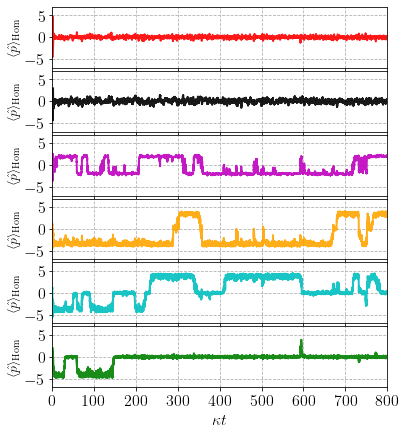

In [35]:
fig, axs = plt.subplots(6,1,sharex=True,sharey=True,figsize=(6,7))

LETTERS = [r"$(a)$",r"$(b)$",r"$(c)$",r"$(d)$",r"$(e)$",r"$(f)$",r"$(g)$"]
ccolors = ['r','k','m','orange','c','g']
fs = 16
lw=2

vp = 0
for i, ax in enumerate(axs.flat):
    ax.plot(t,peΔ[i],color=ccolors[i], linewidth=lw, alpha=0.9)
    # ax.plot(t,xeΔ[i],color='b', linewidth=lw, alpha=0.7)

    ax.set_ylim([-7,7])
    ax.set_xlim([20, 800])
    ax.grid(linestyle='--')
    ax.set_yticks(np.arange(-5, 10, 5))
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.set_xlabel(r'$\kappa t$', fontsize=fs)
    ax.set_ylabel(r'$\langle \hat{p}\rangle_{\rm Hom}$', fontsize=14)
    ax.set_xticks(np.arange(0, 900, 100))
    
    # ax.annotate(LETTERS[i], (0.9,0.15), fontsize = 20, xycoords="axes fraction")
    

plt.subplots_adjust(hspace = 0.05, wspace = -0.1)

fig.savefig('homodyne_delta.pdf', bbox_inches='tight')

In [89]:
# Define parameters

na = 3
G = 1
U = 1/na
κ =  1
ϵ = 0.0*np.sqrt(na)
k2 = 0.0/na


N = 40

nvals = np.arange(1, 8)
Δvals = np.arange(0, 3, 0.2)

a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j*(a - a.dag())/np.sqrt(2)
c_ops = [1j*np.sqrt(κ)*a, np.sqrt(k2)*a**2]

# Define time parameters of the system
tm = 0
tM = 800
ts = 0.01
dt = ts
fs = int(1/ts)
t = np.arange(tm, tM, ts)

# Dictionary of observables
e_dict = {'n': n,
         'x': x,
         'p': p,
         'n2': n**2,
         'x2': x**2
         }
# Specify observables
e_ops = list(e_dict.values())

Δi = [-2.,-1,0,1.5,2.,2.5]

xeΔ = np.zeros((len(Δi), len(t)))
peΔ = np.zeros((len(Δi), len(t)))
neΔ = np.zeros((len(Δi), len(t)))
n2eΔ = np.zeros((len(Δi), len(t)))


for i, Δ in enumerate(Δi):

    H = (G/2) * (a**2 + a.dag()**2) + (U/2)*a.dag()**2 * a**2  - Δ*a.dag()*a
    rho0 = steadystate(H, c_ops)
    psi0 = rho0.eigenstates()[1][0]

    sc_ops = [np.sqrt(κ)*a]
    ntraj = 1   # Number of trajectories to average over
    nsubsteps = 50

    output_photo = photocurrent_sesolve(H, psi0, t, 
                            c_ops = [],
                            sc_ops = sc_ops,
                            ntraj=ntraj, 
                            e_ops = e_ops,
                            nsubsteps=nsubsteps,
                            noise=seed_photo)

    # Create dictionary of observables
    e_t_photo = {key: out for key, out in zip(e_dict, output_photo.expect)}

    xeΔ[i] = e_t_photo['x']
    peΔ[i] = e_t_photo['p']
    neΔ[i] = e_t_photo['n']
    n2eΔ[i] = e_t_photo['n2']

Total run time:  14.61s
Total run time:  14.99s
Total run time:  14.60s
Total run time:  15.90s
Total run time:  14.63s
Total run time:  14.55s


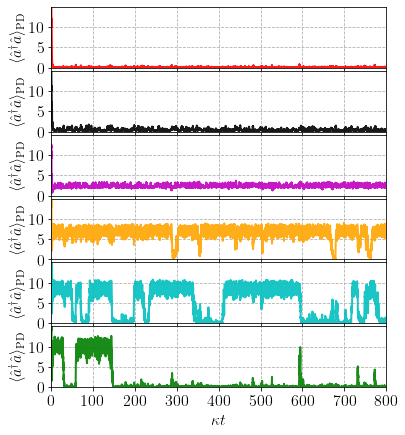

In [40]:
fig, axs = plt.subplots(6,1,sharex=True,sharey=True,figsize=(6,7))

LETTERS = [r"$(a)$",r"$(b)$",r"$(c)$",r"$(d)$",r"$(e)$",r"$(f)$",r"$(g)$"]
fs = 16
lw=2

vp = 0
for i, ax in enumerate(axs.flat):
    ax.plot(t,neΔ[i],color=ccolors[i], linewidth=lw, alpha=0.9)
    # ax.plot(t,xeΔ[i],color='b', linewidth=lw, alpha=0.7)

    ax.set_ylim([0,15])
    ax.set_xlim([20, 800])
    ax.grid(linestyle='--')
    ax.set_yticks(np.arange(0, 15, 5))
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.set_xlabel(r'$\kappa t$', fontsize=fs)
    ax.set_ylabel(r'$\langle \hat{a}^{\dagger}\hat{a}\rangle_{\rm PD}$', fontsize=fs)
    ax.set_xticks(np.arange(0, 900, 100))
    
    # ax.annotate(LETTERS[i], (0.9,0.7), fontsize = 20, xycoords="axes fraction")
    

plt.subplots_adjust(hspace = 0.05, wspace = -0.1)

fig.savefig('number_delta.pdf', bbox_inches='tight')